In [1]:
import pandas as pd
import numpy as np
import os
import json
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
folder_path = "../ECE219_tweet_data/"
files= os.listdir(folder_path)
print(files)

['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']


In [3]:
dfs = {}
for file_ in files: 
    timestamp = []
    retweets = []
    followers = []
    key = file_[7:-4]
    with open(folder_path + file_, encoding="utf8") as f:
        print("Starting for",key)
        for i,line in tqdm(enumerate(f)):
            try:
#                 line = f.readline()
                tweet = json.loads(line,strict=False)
                timestamp.append(tweet['citation_date'])
                retweets.append(tweet['metrics']['citations']['total'])
                followers.append(tweet['author']['followers'])
            except Exception as e:
                print(key,e,i,line)
    dict_data = {'timestamp':list(map(lambda x:datetime.datetime.fromtimestamp(x), timestamp)),
                'retweet_count':retweets,
                'followers_count':followers}
    dfs[key] = pd.DataFrame.from_dict(dict_data)
    print("done for",key)

1290it [00:00, 12892.85it/s]

Starting for #gohawks


169122it [00:11, 15017.02it/s]


done for #gohawks


1392it [00:00, 13905.59it/s]

Starting for #gopatriots


23511it [00:01, 15156.13it/s]


done for #gopatriots


1223it [00:00, 12221.71it/s]

Starting for #nfl


233022it [00:16, 14413.55it/s]


done for #nfl


1394it [00:00, 13935.76it/s]

Starting for #patriots


440621it [00:28, 15367.97it/s]


done for #patriots


2763it [00:00, 13790.80it/s]

Starting for #sb49


743649it [00:49, 15110.49it/s]


done for #sb49


1362it [00:00, 13618.06it/s]

Starting for #superbowl


1213813it [01:23, 14533.89it/s]


done for #superbowl


In [4]:
dfs.keys()

dict_keys(['#gohawks', '#gopatriots', '#nfl', '#patriots', '#sb49', '#superbowl'])

In [5]:
dfs['#gohawks'].head()

,timestamp,retweet_count,followers_count
0,2015-01-17 10:19:38,5,1752.0
1,2015-01-14 10:18:56,2,258.0
2,2015-01-16 20:21:59,5,22.0
3,2015-01-16 20:21:37,2,22.0
4,2015-01-16 20:18:56,2,22.0


### Question 1

In [6]:
def calculate_stats(df,key):
    avg_tweets = len(df)/((max(df['timestamp'])-min(df['timestamp'])).total_seconds()/3600)
    avg_followers = sum(df['followers_count'])/len(df)
    avg_retweet = sum(df['retweet_count'])/len(df)
    print("Average number of tweets/hour for",key,":",avg_tweets)
    print("Average number of followers for",key,":",avg_followers)
    print("Average number of retweets for",key,":",avg_retweet)
    print('-'*50)

In [7]:
for key,df in dfs.items():
    calculate_stats(df,key)

Average number of tweets/hour for #gohawks : 292.48785062173687
Average number of followers for #gohawks : 2217.9237355281984
Average number of retweets for #gohawks : 2.0132093991319877
--------------------------------------------------
Average number of tweets/hour for #gopatriots : 40.95469800606194
Average number of followers for #gopatriots : 1427.2526051635405
Average number of retweets for #gopatriots : 1.4081919101697078
--------------------------------------------------
Average number of tweets/hour for #nfl : 397.0213901819841
Average number of followers for #nfl : 4662.37544523693
Average number of retweets for #nfl : 1.5344602655543254
--------------------------------------------------
Average number of tweets/hour for #patriots : 750.89426460689
Average number of followers for #patriots : 3280.4635616550277
Average number of retweets for #patriots : 1.7852871288476946
--------------------------------------------------
Average number of tweets/hour for #sb49 : 1276.85705986

### Question 2

In [8]:
def group_tweets(df,key):
    a = df.groupby(pd.Grouper(key='timestamp',freq='60Min'))
    print(a)
    plt.figure(figsize=(12,8))
    plt.bar(range(len(list(a.count().reset_index()['retweet_count']))),list(a.count().reset_index()['retweet_count']))
    plt.title('number of tweets in hour '+ key)
    
    plt.show()
    

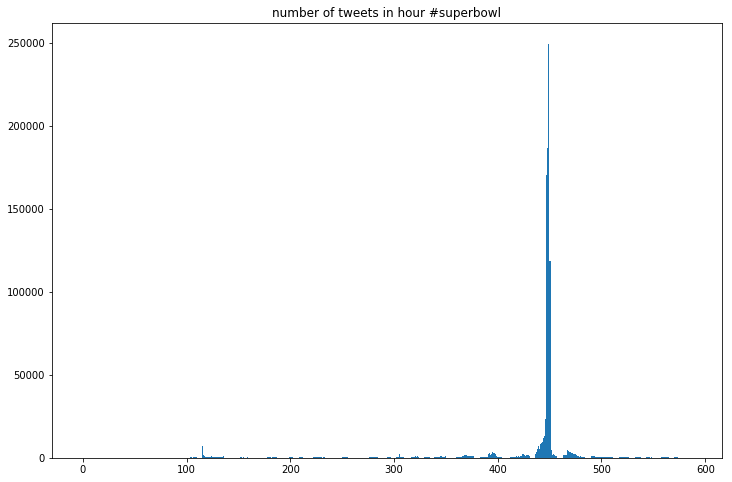

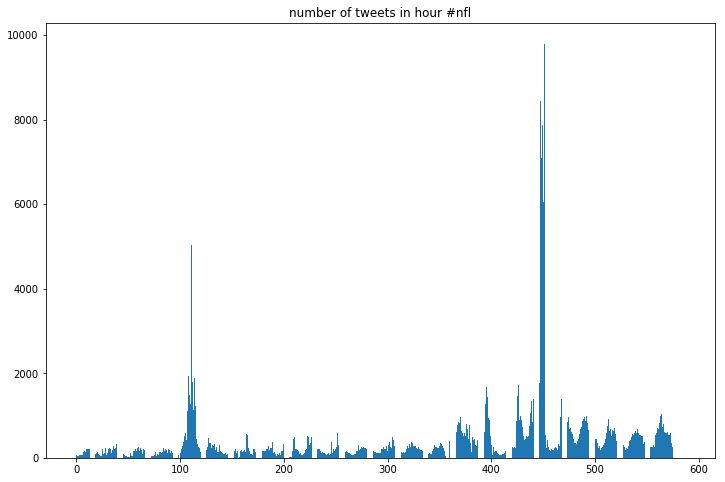

In [9]:
group_tweets(dfs['#superbowl'],'#superbowl')
group_tweets(dfs['#nfl'],'#nfl')

In [10]:
dfs['#superbowl']

,timestamp,retweet_count,followers_count
0,2015-01-16 20:21:37,2,22.0
1,2015-01-16 20:06:19,15,22.0
2,2015-01-14 12:22:37,2,858.0
3,2015-01-14 10:48:18,2,14335.0
4,2015-01-15 02:00:31,7,1143.0
5,2015-01-15 14:43:54,34,426.0
6,2015-01-17 04:01:44,3,5869.0
7,2015-01-14 02:04:33,10,49.0
8,2015-01-14 05:07:25,6,14.0
9,2015-01-14 12:28:31,11,0.0


### Question 3

In [11]:
def fill_in_missing_dates(df, date_col_name = 'timestamp',date_order = 'asc', fill_value = 0, days_back = 30):
    df.set_index(date_col_name,drop=True,inplace=True)
    df.index = pd.DatetimeIndex(df.index)
    idx = pd.date_range(df.index.min(), df.index.max(), freq = "H")
    df = df.reindex(idx,fill_value=fill_value)
    df.reset_index(inplace=True)
    return df

In [12]:
def group_data(df):
    df['hours'] = list(map(lambda x: x.hour,df['timestamp']))
    grouped_df = (df.groupby(['hours',pd.Grouper(key='timestamp',freq='60Min')])
              .agg({'retweet_count':['count','sum'], 'followers_count':['sum','max']}))
    grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns.values]
    grouped_df.rename(index=str, columns={"retweet_count_count": "no_of_tweets"}, inplace=True)
    grouped_df.reset_index(inplace=True)
    grouped_df = fill_in_missing_dates(grouped_df)
    y = grouped_df['no_of_tweets'].shift(-1)
    y = y[:-1]
    grouped_df = grouped_df[:-1]
    return grouped_df.drop(['index'],axis=1),y

def regression(df,key):
    exog, endog = group_data(df)
    mod = sm.OLS(endog.astype(float), exog.astype(float))
    res = mod.fit()
    print('-'*50,key,'-'*50)
    print(res.summary())
    print("MSE for",key, ":",res.mse_resid)
    print('\n\n')


In [13]:
for key,df in dfs.items():
    print(key)
    regression(df,key)
#     break
# print(max(dfs['#superbowl']['followers_count']))

#gohawks
-------------------------------------------------- #gohawks --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     116.5
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           6.98e-85
Time:                        17:27:44   Log-Likelihood:                -4733.9
No. Observations:                 578   AIC:                             9478.
Df Residuals:                     573   BIC:                             9500.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--

-------------------------------------------------- #sb49 --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     486.4
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          3.23e-204
Time:                        17:27:52   Log-Likelihood:                -5656.6
No. Observations:                 582   AIC:                         1.132e+04
Df Residuals:                     577   BIC:                         1.134e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------

### Question 4

In [14]:
# Load new data 
# Added ranking and momentum to the data
dfs = {}
for file_ in files: 
    data = {}
    key = file_[7:-4]
    with open(folder_path + file_, encoding="utf8") as f:
        print("Starting for",key)
        for line in tqdm(f):
            try:
                tweet = json.loads(line,strict=False)
                data.setdefault('timestamp',[]).append(tweet['citation_date'])
                data.setdefault('retweets',[]).append(tweet['metrics']['citations']['total'])
                data.setdefault('followers',[]).append(tweet['author']['followers'])
                data.setdefault('ranking',[]).append(tweet['metrics']['ranking_score'])
                data.setdefault('momentum',[]).append(tweet['metrics']['momentum'])
                data.setdefault('impressions',[]).append(tweet['metrics']['impressions'])
            except Exception as e:
                print(key,e)
    dict_data = {'timestamp': list(map(lambda x:datetime.datetime.fromtimestamp(x), data['timestamp'])),
                'retweet_count': data['retweets'],
                'followers_count': data['followers'],
                'ranking': data['ranking'],
                'momentum': data['momentum'],
                'impressions': data['impressions']}
    dfs[key] = pd.DataFrame.from_dict(dict_data)
    print("done for",key)

1189it [00:00, 11875.66it/s]

Starting for #gohawks


169122it [00:11, 14520.92it/s]


done for #gohawks


1221it [00:00, 12206.64it/s]

Starting for #gopatriots


23511it [00:01, 13482.02it/s]
1202it [00:00, 12016.60it/s]

done for #gopatriots
Starting for #nfl


233022it [00:18, 12380.93it/s]
1067it [00:00, 10665.31it/s]

done for #nfl
Starting for #patriots


440621it [00:32, 13407.71it/s]
957it [00:00, 9565.17it/s]

done for #patriots
Starting for #sb49


743649it [00:50, 14713.70it/s]
1098it [00:00, 10977.79it/s]

done for #sb49
Starting for #superbowl


1213813it [01:22, 14725.85it/s]


done for #superbowl


In [15]:
def regression_new_features(df,key):
    df['hours'] = list(map(lambda x: x.hour,df['timestamp']))
    grouped_df = (df.groupby(['hours',pd.Grouper(key='timestamp',freq='60Min')])
              .agg({'retweet_count':['count','sum'], 'followers_count':['sum','max'], 'ranking':'mean',
                    'momentum':'mean','impressions':'sum'}))
#     grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns.values]
#     grouped_df.rename(index=str, columns={"retweet_count_count": "no_of_tweets"}, inplace=True)
#     grouped_df.reset_index(inplace=True)
    
    grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns.values]
    grouped_df.rename(index=str, columns={"retweet_count_count": "no_of_tweets"}, inplace=True)
    grouped_df.reset_index(inplace=True)
    grouped_df = fill_in_missing_dates(grouped_df)
    
    grouped_df.drop(['index'],axis=1,inplace=True)
    y = grouped_df['no_of_tweets'].shift(-1)
    y = y[:-1]
    grouped_df = grouped_df[:-1]
#     print(grouped_df)
#     print(len(y),len(grouped_df))
#     exog, endog = group_data(df)
    mod = sm.OLS(y.astype(float), grouped_df.astype(float))
    res = mod.fit()
    p_values = res.pvalues
    p_keys = list(p_values.nsmallest(n=3).keys())
    y_pred = res.predict(grouped_df.astype(float))
    for p in p_keys:
        plt.scatter(grouped_df[p], y_pred)
        plt.xlabel(p)
        plt.ylabel("Predicted Y values")
        plt.title("Predicted vs " +p)
        plt.show()
        
    print('-'*50,key,'-'*50)
    print(res.summary())
    print('\n\n')
    print("MSE for",key, ":",res.mse_resid)
    print('\n\n')

### Question 4 and 5

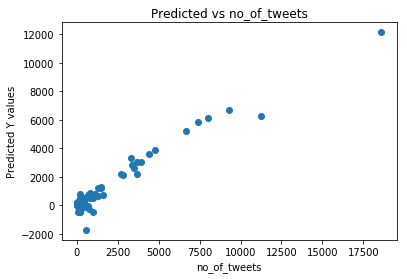

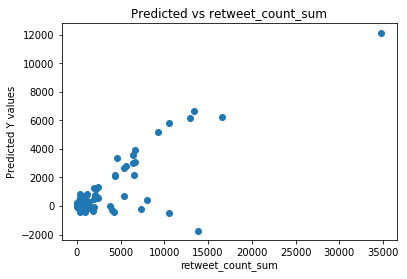

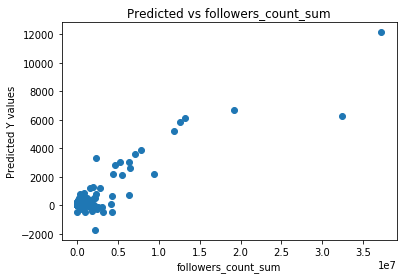

-------------------------------------------------- #gohawks --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     73.84
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           4.98e-83
Time:                        17:31:24   Log-Likelihood:                -4731.1
No. Observations:                 578   AIC:                             9478.
Df Residuals:                     570   BIC:                             9513.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------

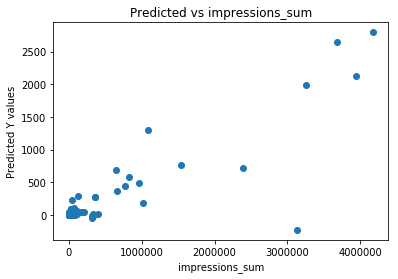

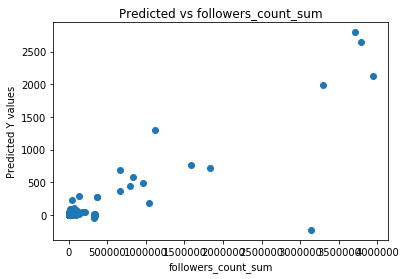

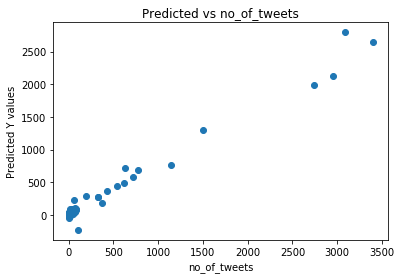

-------------------------------------------------- #gopatriots --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     127.0
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          4.84e-121
Time:                        17:31:24   Log-Likelihood:                -3745.3
No. Observations:                 574   AIC:                             7507.
Df Residuals:                     566   BIC:                             7541.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------

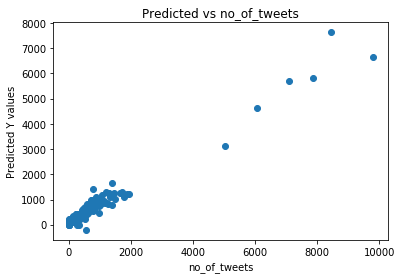

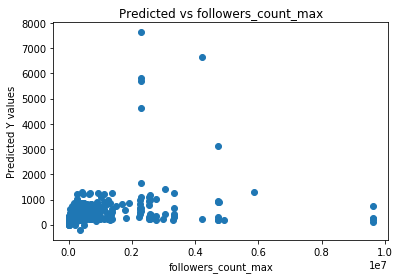

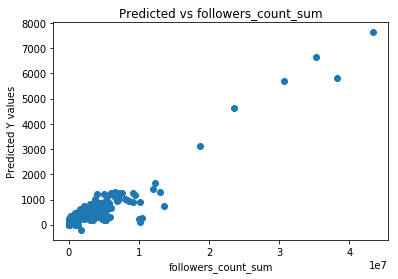

-------------------------------------------------- #nfl --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     139.0
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          2.71e-129
Time:                        17:31:26   Log-Likelihood:                -4495.0
No. Observations:                 586   AIC:                             9006.
Df Residuals:                     578   BIC:                             9041.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------

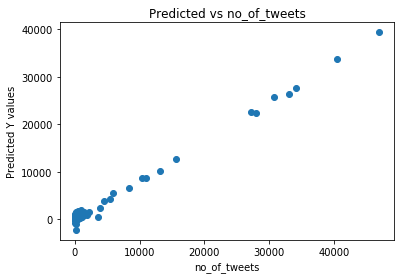

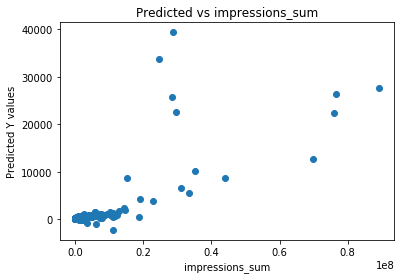

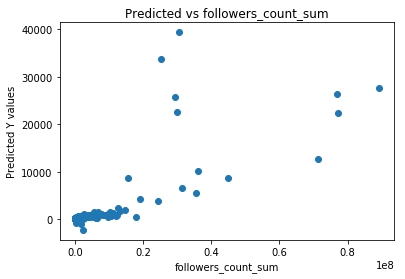

-------------------------------------------------- #patriots --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          3.95e-138
Time:                        17:31:29   Log-Likelihood:                -5360.2
No. Observations:                 586   AIC:                         1.074e+04
Df Residuals:                     578   BIC:                         1.077e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------

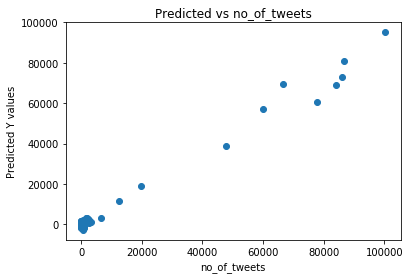

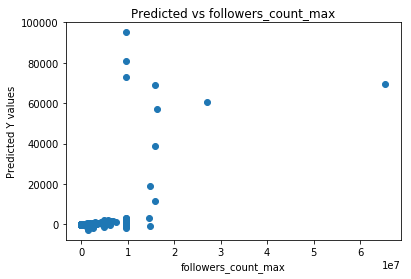

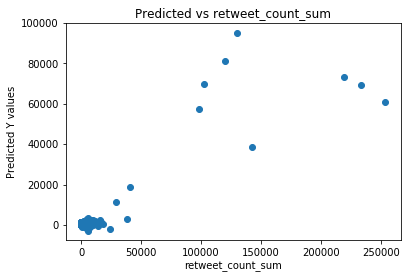

-------------------------------------------------- #sb49 --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     305.0
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          4.06e-201
Time:                        17:31:33   Log-Likelihood:                -5654.5
No. Observations:                 582   AIC:                         1.133e+04
Df Residuals:                     574   BIC:                         1.136e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------

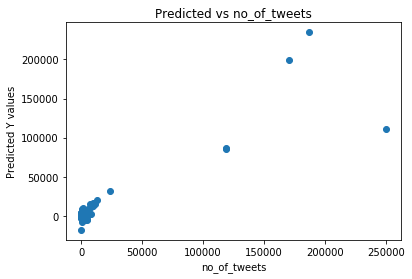

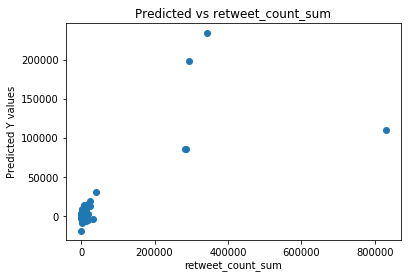

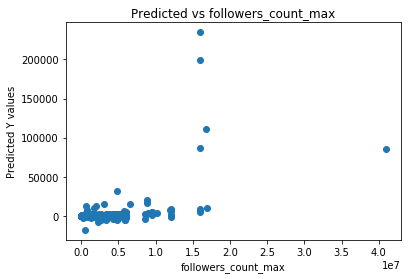

-------------------------------------------------- #superbowl --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          6.86e-202
Time:                        17:31:40   Log-Likelihood:                -6031.6
No. Observations:                 586   AIC:                         1.208e+04
Df Residuals:                     578   BIC:                         1.211e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------

In [16]:
for key,df in dfs.items():
    regression_new_features(df,key)

## Question 6

In [17]:
def get_frame_for_train_hours(df):
    df['hours'] = list(map(lambda x: x.hour,df['timestamp']))
    grouped_df = (df.groupby(['hours',pd.Grouper(key='timestamp',freq='60Min')])
              .agg({'retweet_count':['count','sum'], 'followers_count':['sum','max'], 'ranking':'mean',
                    'momentum':'mean','impressions':'sum'}))

    grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns.values]
    grouped_df.rename(index=str, columns={"retweet_count_count": "no_of_tweets"}, inplace=True)
    grouped_df.reset_index(inplace=True)
    grouped_df = fill_in_missing_dates(grouped_df)
    
    grouped_df.drop(['index'],axis=1,inplace=True)
    y = grouped_df['no_of_tweets'].shift(-1)
    y = y[:-1]
    grouped_df = grouped_df[:-1]
    return grouped_df, y
    

In [18]:
def get_not_active(df):
    not_active = df[df['timestamp']<'2015-02-01 08:00:00']
    grouped_df, y = get_frame_for_train_hours(not_active)
    
    return grouped_df, y

In [19]:
def get_after_active(df):
    after_active = df[df['timestamp']>'2015-02-01 20:00:00']
    grouped_df, y = get_frame_for_train_hours(after_active)
    return grouped_df,y

In [20]:
def get_active(df):
    active = df[(df['timestamp']>='2015-02-01 08:00:00') & 
                        (df['timestamp']<='2015-02-01 20:00:00')]
    active['5minutes'] = list(map(lambda x: x.minute,active['timestamp']))
    for i in range(0,60,5):
        active.loc[active['5minutes']==i, '5minutes'] = i
        active.loc[active['5minutes']==i+1, '5minutes'] = i
        active.loc[active['5minutes']==i+2, '5minutes'] = i
        active.loc[active['5minutes']==i+3, '5minutes'] = i
        active.loc[active['5minutes']==i+4, '5minutes'] = i
    # Do this explicitly because need to group by 5 minutes
    grouped_df = (active.groupby(['5minutes',pd.Grouper(key='timestamp',freq='5Min')])
                  .agg({'retweet_count':['count','sum'], 'followers_count':['sum','max'], 'ranking':'mean',
                        'momentum':'mean','impressions':'sum'}))

    grouped_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_df.columns.values]
    grouped_df.rename(index=str, columns={"retweet_count_count": "no_of_tweets"}, inplace=True)
    grouped_df.reset_index(inplace=True)

    date_order = 'asc'
    fill_value = 0
    days_back = 30

    grouped_df.set_index('timestamp',drop=True,inplace=True)
    grouped_df.index = pd.DatetimeIndex(grouped_df.index)
    idx = pd.date_range(grouped_df.index.min(), grouped_df.index.max(), freq = "5min")

    grouped_df = grouped_df.reindex(idx,fill_value=fill_value)

    grouped_df.reset_index(inplace=True)


    grouped_df.drop(['index'],axis=1,inplace=True)
    y = grouped_df['no_of_tweets'].shift(-1)
    y = y[:-1]
    grouped_df = grouped_df[:-1]

    return grouped_df, y

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def grid_search_and_predict(x,y):
    linear_regression = LinearRegression()
    x = x.astype(float).values
    y = y.astype(float).values
    clf_gradient = GridSearchCV(linear_regression,param_grid = {}, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error'
                                          ,n_jobs=-1, verbose = 1)
    clf_gradient.fit(x,y)
    print(clf_gradient.best_params_)
    predicted = clf_gradient.predict(x)
    mse = np.mean(np.square(y - predicted))
    r2 = r2_score(y, predicted)
    print('MSE = ', mse)
    print('R2 = ', r2)
    print(-clf_gradient.best_score_)
    return clf_gradient

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
for key,df in dfs.items():
    not_active_aggregate, y_not_active = get_not_active(df)
    after_active_aggregate, y_after_active = get_after_active(df)
    active_aggregate, y_active = get_active(df)
    
    print('-'*25,key,'active','-'*25)
    clf_active = grid_search_and_predict(active_aggregate, y_active)

    print('-'*25,key,'not_active','-'*25)
    clf_not_active = grid_search_and_predict(not_active_aggregate, y_not_active)
    
    print('-'*25,key,'after_active','-'*25)
    clf_after_active = grid_search_and_predict(after_active_aggregate, y_after_active)
    '''
    mod_not_active = sm.OLS(y_not_active.astype(float), not_active_aggregate.astype(float))
    res_not_active = mod_not_active.fit()
    print('-'*25,key,'not_active','-'*25)
    print(res_not_active.summary())
    print('R-Squared = ',res_not_active.rsquared)
    print('MSE = ',res_not_active.mse_resid)
    
    mod_active = sm.OLS(y_active.astype(float), active_aggregate.astype(float))
    res_active = mod_active.fit()
    print('-'*25,key,'active','-'*25)
    print(res_active.summary())
    print('R-Squared = ',res_active.rsquared)
    print('MSE = ',res_active.mse_resid)
    
    mod_after_active = sm.OLS(y_after_active.astype(float), after_active_aggregate.astype(float))
    res_after_active = mod_after_active.fit()
    print('-'*25,key,'after_active','-'*25)
    print(res_after_active.summary())
    
    print('R-Squared = ',res_after_active.rsquared)
    print('MSE = ',res_after_active.mse_resid)'''

/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

------------------------- #gohawks active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


{}
MSE =  73729.51843932953
R2 =  0.48028836807488895
102274.51842141112
------------------------- #gohawks not_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{}
MSE =  701388.2912196745
R2 =  0.3196484514434065
1913359.565620773
------------------------- #gohawks after_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  904.7553131763676
R2 =  0.9182293694965499
7606847.610283329


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

------------------------- #gopatriots active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  13822.64803680226
R2 =  0.46181371989285225
19470.29711829697
------------------------- #gopatriots not_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  1730.9947110373832
R2 =  0.5778617518372777
10417.125415081753
------------------------- #gopatriots after_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  33.81709679519066
R2 =  0.8085377714504116
202.7648187393774


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and wil

------------------------- #nfl active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  21110.8734010879
R2 =  0.8172525180570319
26426.58488047109
------------------------- #nfl not_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  65364.74238341987
R2 =  0.5158077658401934
71455.2020348635
------------------------- #nfl after_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  16021.246297381975
R2 =  0.813152921829061
24228.713097136864


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and wil

------------------------- #patriots active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  697853.0525191195
R2 =  0.6989371175376538
782730.4577982125
------------------------- #patriots not_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  334661.841273611
R2 =  0.5716534545196443
553468.1129736698
------------------------- #patriots after_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  9945.445755625058
R2 =  0.889416720621399
17415.28663051658


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and wil

------------------------- #sb49 active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  1284650.0745279046
R2 =  0.8663092879264375
1689072.2158273058
------------------------- #sb49 not_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  6827.991117529616
R2 =  0.869083362085354
8689.614030160674
------------------------- #sb49 after_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  72191.86528729784
R2 =  0.8031005332334826
203661.75345660603


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0

------------------------- #superbowl active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  6821401.246361589
R2 =  0.8907607286551587
20951379.465198964
------------------------- #superbowl not_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  513625.6650041958
R2 =  0.40478486913255307
657968.3335383845
------------------------- #superbowl after_active -------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{}
MSE =  109149.95869667521
R2 =  0.8465692731115256
192416.05055171627


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and wil

## Question 7

In [23]:
full_dataset_list = []
for key, df in dfs.items():
    full_dataset_list.append(df)
full_train_dataset = pd.concat(full_dataset_list)

In [24]:
full_train_dataset.reset_index(drop=True)

,timestamp,retweet_count,followers_count,ranking,momentum,impressions,hours
0,2015-01-17 10:19:38,5,1752.0,4.743703,1,1754,10
1,2015-01-14 10:18:56,2,258.0,3.646109,0,162,10
2,2015-01-16 20:21:59,5,22.0,3.500887,1,5,20
3,2015-01-16 20:21:37,2,22.0,3.229207,0,5,20
4,2015-01-16 20:18:56,2,22.0,3.759005,0,5,20
5,2015-01-16 20:16:16,2,22.0,3.718140,0,5,20
6,2015-01-16 20:15:44,2,22.0,3.441431,0,5,20
7,2015-01-16 00:08:22,3,186.0,3.412319,1,172,0
8,2015-01-16 20:13:01,2,22.0,3.538161,0,4,20
9,2015-01-16 20:12:16,8,22.0,3.882638,1,4,20


In [25]:
not_active_aggregate, y_not_active = get_not_active(full_train_dataset)
after_active_aggregate, y_after_active = get_after_active(full_train_dataset)
active_aggregate, y_active = get_active(full_train_dataset)

/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [26]:
mod_not_active = sm.OLS(y_not_active.astype(float), not_active_aggregate.astype(float))
res_not_active = mod_not_active.fit()
print(res_not_active.summary())
print('R-Squared = ',res_not_active.rsquared)
print('MSE = ',res_not_active.mse_resid)

                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     60.85
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           4.71e-66
Time:                        17:33:22   Log-Likelihood:                -3981.1
No. Observations:                 439   AIC:                             7978.
Df Residuals:                     431   BIC:                             8011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
hours                  -5.8319    

In [27]:
mod_active = sm.OLS(y_active.astype(float), active_aggregate.astype(float))
res_active = mod_active.fit()
print(res_active.summary())
print('R-Squared = ',res_active.rsquared)
print('MSE = ',res_active.mse_resid)

                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     276.5
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           9.02e-80
Time:                        17:33:22   Log-Likelihood:                -1395.2
No. Observations:                 143   AIC:                             2806.
Df Residuals:                     135   BIC:                             2830.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
5minutes               -6.0147    

In [28]:
mod_after_active = sm.OLS(y_after_active.astype(float), after_active_aggregate.astype(float))
res_after_active = mod_after_active.fit()
print(res_after_active.summary())
print('R-Squared = ',res_after_active.rsquared)
print('MSE = ',res_after_active.mse_resid)

                            OLS Regression Results                            
Dep. Variable:           no_of_tweets   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     211.9
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           3.08e-69
Time:                        17:33:22   Log-Likelihood:                -1059.6
No. Observations:                 134   AIC:                             2135.
Df Residuals:                     126   BIC:                             2158.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
hours                 -23.0468    

## Question 8

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold

In [30]:
training_x, training_y = get_frame_for_train_hours(full_train_dataset)

In [31]:
training_x = training_x.astype(float).values
training_y = training_y.astype(float).values

In [32]:
parameters = {
'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000,
1200, 1400, 1600, 1800, 2000]
}

In [33]:
random_forest = RandomForestRegressor()
clf_random_forest_full_data = GridSearchCV(random_forest, parameters, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error'
                                          ,n_jobs=-1, verbose = 1)
clf_random_forest_full_data.fit(training_x, training_y)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 42.3min finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 20, 40, 60, 80, 100, 200, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [34]:
gradient_boost = GradientBoostingRegressor()
clf_gradient_boost_full_data = GridSearchCV(gradient_boost, parameters, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error'
                                          ,n_jobs=-1, verbose = 1)
clf_gradient_boost_full_data.fit(training_x, training_y)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 22.4min finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 20, 40, 60, 80, 100, 200, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [35]:
from sklearn.metrics import r2_score
print(clf_random_forest_full_data.best_params_)
predicted = clf_random_forest_full_data.predict(training_x)
mse = np.mean(np.square(training_y - predicted))
r2 = r2_score(training_y, predicted)
print('MSE = ', mse)
print('R2 = ', r2)
print(-clf_random_forest_full_data.best_score_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
MSE =  146591607.37777954
R2 =  0.8158190833454346
283298242.08916306


In [36]:
print(clf_gradient_boost_full_data.best_params_)
predicted = clf_gradient_boost_full_data.predict(training_x)
mse = np.mean(np.square(training_y - predicted))
r2 = r2_score(training_y, predicted)
print('MSE = ', mse)
print('R2 = ', r2)
print(-clf_gradient_boost_full_data.best_score_)

{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 2000}
MSE =  9.986084064492314e-08
R2 =  0.9999999999999999
213478102.40605345


In [37]:
ols_full = sm.OLS(training_y, training_x)
res_ols_full = ols_full.fit()
print(res_ols_full.summary())
print('R-Squared = ',res_ols_full.rsquared)
print('MSE = ',res_ols_full.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     377.1
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          9.66e-224
Time:                        18:38:17   Log-Likelihood:                -6309.4
No. Observations:                 586   AIC:                         1.263e+04
Df Residuals:                     578   BIC:                         1.267e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -19.6935     69.353     -0.284      0.7

## Question 10

In [38]:
def grid_search_and_predict(x,y, parameters):
    gradient_boost = GradientBoostingRegressor()
    x = x.astype(float).values
    y = y.astype(float).values
    clf_gradient = GridSearchCV(gradient_boost, parameters, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error'
                                          ,n_jobs=-1, verbose = 1)
    clf_gradient.fit(x,y)
    print(clf_gradient.best_params_)
    predicted = clf_gradient.predict(x)
    mse = np.mean(np.square(y - predicted))
    r2 = r2_score(y, predicted)
    print('MSE = ', mse)
    print('R2 = ', r2)
    print(-clf_gradient.best_score_)
    return clf_gradient

In [39]:
parameters = {
'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000,
1200, 1400, 1600, 1800, 2000]
}
clf_gradient_active = grid_search_and_predict(active_aggregate, y_active, parameters)
clf_gradient_not_active = grid_search_and_predict(not_active_aggregate, y_not_active,parameters)
clf_gradient_after_active = grid_search_and_predict(after_active_aggregate, y_after_active, parameters)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  4.9min finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}
MSE =  1.5622345721473328e-07
R2 =  0.9999999999999987
19896449.35150022
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 11.9min finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search

{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}
MSE =  9.99657724573395e-08
R2 =  0.9999999999999867
4126719.616512878
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  4.1min


{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
MSE =  9.839846371021298e-08
R2 =  0.9999999999999695
218744.58488676182


[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  4.7min finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Question 11

In [40]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
def train_mlpRegressor_model_1(x,y):
        mlp_regressor_model = MLPRegressor(hidden_layer_sizes=(5,),
                                       activation='relu',
                                       solver='adam',
                                       learning_rate='adaptive',
                                       max_iter=1000,
                                       learning_rate_init=0.01,
                                       alpha=0.01,
                                       random_state=33,
                                       shuffle = True)
        mlp_regressor_model.fit(x, y)
        print(mlp_regressor_model.get_params)
        predicted = mlp_regressor_model.predict(x)
        mse = np.mean(np.square(y-predicted))
        r2 = r2_score(y,predicted)
        print('MSE = ', mse)
        print('R2 = ', r2)
train_mlpRegressor_model_1(active_aggregate, y_active)
train_mlpRegressor_model_1(not_active_aggregate, y_not_active)
train_mlpRegressor_model_1(after_active_aggregate, y_after_active)

def train_mlpRegressor_model_2(x,y):
        mlp_regressor_model = MLPRegressor(hidden_layer_sizes=(10,),
                                       activation='relu',
                                       solver='adam',
                                       learning_rate='adaptive',
                                       max_iter=10000,
                                       learning_rate_init=0.01,
                                       alpha=0.01,
                                       random_state=33,
                                       shuffle = True)
        mlp_regressor_model.fit(x, y)
        print(mlp_regressor_model.get_params)
        predicted = mlp_regressor_model.predict(x)
        mse = np.mean(np.square(y-predicted))
        r2 = r2_score(y,predicted)
        print('MSE = ', mse)
        print('R2 = ', r2)
train_mlpRegressor_model_2(active_aggregate, y_active)
train_mlpRegressor_model_2(not_active_aggregate, y_not_active)
train_mlpRegressor_model_2(after_active_aggregate, y_after_active)

def train_mlpRegressor_model_3(x,y):
        mlp_regressor_model = MLPRegressor(hidden_layer_sizes=(100,),
                                       activation='relu',
                                       solver='adam',
                                       learning_rate='adaptive',
                                       max_iter=10000,
                                       learning_rate_init=0.01,
                                       alpha=0.01,
                                       random_state=33,
                                       shuffle = True)
        mlp_regressor_model.fit(x, y)
        print(mlp_regressor_model.get_params)
        predicted = mlp_regressor_model.predict(x)
        mse = np.mean(np.square(y-predicted))
        r2 = r2_score(y,predicted)
        print('MSE = ', mse)
        print('R2 = ', r2)
train_mlpRegressor_model_3(active_aggregate, y_active)
train_mlpRegressor_model_3(not_active_aggregate, y_not_active)
train_mlpRegressor_model_3(after_active_aggregate, y_after_active)

def train_mlpRegressor_model_4(x,y):
        mlp_regressor_model = MLPRegressor(hidden_layer_sizes=(50,),
                                       activation='relu',
                                       solver='adam',
                                       learning_rate='adaptive',
                                       max_iter=100000,
                                       learning_rate_init=0.05,
                                       alpha=0.01,
                                       random_state=33,
                                       shuffle = True)
        mlp_regressor_model.fit(x, y)
        print(mlp_regressor_model.get_params)
        predicted = mlp_regressor_model.predict(x)
        mse = np.mean(np.square(y-predicted))
        r2 = r2_score(y,predicted)
        print('MSE = ', mse)
        print('R2 = ', r2)
train_mlpRegressor_model_4(active_aggregate, y_active)
train_mlpRegressor_model_4(not_active_aggregate, y_not_active)
train_mlpRegressor_model_4(after_active_aggregate, y_after_active)

def train_mlpRegressor_model_5(x,y):
        mlp_regressor_model = MLPRegressor(hidden_layer_sizes=(25,),
                                       activation='relu',
                                       solver='adam',
                                       learning_rate='adaptive',
                                       max_iter=10000,
                                       learning_rate_init=0.01,
                                       alpha=0.01,
                                       random_state=33,
                                       shuffle = True)
        mlp_regressor_model.fit(x, y)
        print(mlp_regressor_model.get_params)
        predicted = mlp_regressor_model.predict(x)
        mse = np.mean(np.square(y-predicted))
        r2 = r2_score(y,predicted)
        print('MSE = ', mse)
        print('R2 = ', r2)
train_mlpRegressor_model_5(active_aggregate, y_active)
train_mlpRegressor_model_5(not_active_aggregate, y_not_active)
train_mlpRegressor_model_5(after_active_aggregate, y_after_active)

<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=33, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)>
MSE =  130011018216.80319
R2 =  -1140.4678442059703
<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=33, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, 

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(active_aggregate)
StandardScaler(copy=True, with_mean=True, with_std=True)
active_aggregate_scaled = scaler.transform(active_aggregate)

scaler.fit(not_active_aggregate)
StandardScaler(copy=True, with_mean=True, with_std=True)
not_active_aggregate_scaled = scaler.transform(not_active_aggregate)

scaler.fit(after_active_aggregate)
StandardScaler(copy=True, with_mean=True, with_std=True)
after_active_aggregate_scaled = scaler.transform(after_active_aggregate)


################ IMPORTANT ################
#Randomly chose model 5 please decide proper model
train_mlpRegressor_model_5(active_aggregate_scaled, y_active)
train_mlpRegressor_model_5(not_active_aggregate_scaled, y_not_active)
train_mlpRegressor_model_5(after_active_aggregate_scaled, y_after_active)


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  import sys
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/hom

<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=33, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)>
MSE =  10332441.352642475
R2 =  0.9092834613715755
<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=33, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.

/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import sys

"""parameters = {
    'hidden_layer_sizes':[(25,),(50,),(5,),(100,)],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'sgd', 'adam'],
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'max_iter':[10000,20000,30000],
    'learning_rate_init':[0.01,0.05,0.001],  
}"""

parameters = {
    'hidden_layer_sizes':[(25,),(50,),(5,),(100,)],
    'activation':['relu'],
    'solver':['sgd', 'adam'],
    'learning_rate':['adaptive'],
    'max_iter':[10000,20000,30000],
    'learning_rate_init':[0.01,0.05,0.001],  
}



training_x = active_aggregate_scaled.astype(float)
training_y = y_active.astype(float)

lowerBound, upperBound = sys.float_info.min, sys.float_info.max
training_x = np.clip(training_x, lowerBound, upperBound, out=training_x)
    
print(np.any(np.isnan(training_x)))
print(np.all(np.isfinite(training_x)))









mlp_regressor = MLPRegressor()
clf_mlp_regressor_full_data = GridSearchCV(mlp_regressor, parameters, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error'
                                          ,n_jobs=-1, verbose = 1)
clf_mlp_regressor_full_data.fit(training_x, training_y)

predicted = clf_mlp_regressor_full_data.predict(training_x)
mse = np.mean(np.square(training_y-predicted))
r2 = r2_score(training_y,predicted)
print('MSE = ', mse)
print('R2 = ', r2)
print(clf_mlp_regressor_full_data.best_params_)
print(-clf_mlp_regressor_full_data.best_score_)


training_x = not_active_aggregate_scaled.astype(float)
training_y = y_not_active.astype(float)

lowerBound, upperBound = sys.float_info.min, sys.float_info.max
training_x = np.clip(training_x, lowerBound, upperBound, out=training_x)
    
print(np.any(np.isnan(training_x)))
print(np.all(np.isfinite(training_x)))


clf_mlp_regressor_full_data.fit(training_x, training_y)

predicted = clf_mlp_regressor_full_data.predict(training_x)
mse = np.mean(np.square(training_y-predicted))
r2 = r2_score(training_y,predicted)
print('MSE = ', mse)
print('R2 = ', r2)        
print(clf_mlp_regressor_full_data.best_params_)
print(-clf_mlp_regressor_full_data.best_score_)


training_x = after_active_aggregate_scaled.astype(float)
training_y = y_after_active.astype(float)

lowerBound, upperBound = sys.float_info.min, sys.float_info.max
training_x = np.clip(training_x, lowerBound, upperBound, out=training_x)
    
print(np.any(np.isnan(training_x)))
print(np.all(np.isfinite(training_x)))


clf_mlp_regressor_full_data.fit(training_x, training_y)

predicted = clf_mlp_regressor_full_data.predict(training_x)
mse = np.mean(np.square(training_y-predicted))
r2 = r2_score(training_y,predicted)
print('MSE = ', mse)
print('R2 = ', r2) 
print(clf_mlp_regressor_full_data.best_params_)
print(-clf_mlp_regressor_full_data.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


False
True
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.8min finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MSE =  21647506.189987052
R2 =  0.8099397069414975
{'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 10000, 'solver': 'adam'}
30021959.917813286
False
True
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  5.4min finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MSE =  4567079.098533727
R2 =  0.3909419208307032
{'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 30000, 'solver': 'adam'}
5034671.055317688
False
True
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.8min finished
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MSE =  269159.34811946336
R2 =  0.9163339311124871
{'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 20000, 'solver': 'adam'}
793944.7250339352


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Q14

In [43]:
#load test data
folder_path = "../ECE219_tweet_test/"
files= os.listdir(folder_path)
print(files)

['sample0_period1.txt', 'sample0_period2.txt', 'sample0_period3.txt', 'sample1_period1.txt', 'sample1_period2.txt', 'sample1_period3.txt', 'sample2_period1.txt', 'sample2_period2.txt', 'sample2_period3.txt']


In [44]:
dfs = {}
for file_ in files: 
    data = {}
    key = file_[7:-4]
    with open(folder_path + file_, encoding="utf8") as f:
        print("Starting for",key)
        for line in tqdm(f):
            try:
                tweet = json.loads(line,strict=False)
                data.setdefault('timestamp',[]).append(tweet['citation_date'])
                data.setdefault('retweets',[]).append(tweet['metrics']['citations']['total'])
                data.setdefault('followers',[]).append(tweet['author']['followers'])
                data.setdefault('ranking',[]).append(tweet['metrics']['ranking_score'])
                data.setdefault('momentum',[]).append(tweet['metrics']['momentum'])
                data.setdefault('impressions',[]).append(tweet['metrics']['impressions'])
            except Exception as e:
                print(key,e)
    dict_data = {'timestamp': list(map(lambda x:datetime.datetime.fromtimestamp(x), data['timestamp'])),
                'retweet_count': data['retweets'],
                'followers_count': data['followers'],
                'ranking': data['ranking'],
                'momentum': data['momentum'],
                'impressions': data['impressions']}
    dfs[key] = pd.DataFrame.from_dict(dict_data)
    print("done for",key)

0it [00:00, ?it/s]

Starting for _period1


568it [00:00, 11179.35it/s]

done for _period1



3092it [00:00, 15291.07it/s]

Starting for _period2


13377it [00:00, 15501.17it/s]
410it [00:00, 12023.52it/s]


done for _period2
Starting for _period3
done for _period3


2280it [00:00, 13138.86it/s]

Starting for _period1
done for _period1



1512it [00:00, 15117.24it/s]

Starting for _period2


5549it [00:00, 15199.02it/s]
305it [00:00, 12295.16it/s]
0it [00:00, ?it/s]

done for _period2
Starting for _period3
done for _period3
Starting for _period1


953it [00:00, 13730.23it/s]
152it [00:00, 9849.13it/s]
399it [00:00, 12783.41it/s]

done for _period1
Starting for _period2
done for _period2
Starting for _period3
done for _period3


In [45]:
dfs

{'_period1':               timestamp  retweet_count  followers_count   ranking  momentum  \
 0   2015-01-26 17:05:59              1            275.0  4.333201         0   
 1   2015-01-26 17:06:38              2            614.0  7.366303         0   
 2   2015-01-26 17:07:22              1           1321.0  7.560044         0   
 3   2015-01-26 17:07:49              1           1224.0  4.334510         0   
 4   2015-01-26 17:08:07              1            158.0  4.035789         0   
 5   2015-01-26 17:09:38              1            273.0  4.297929         0   
 6   2015-01-26 17:11:28              1            466.0  4.013117         0   
 7   2015-01-26 17:12:01              1              6.0  4.116370         0   
 8   2015-01-26 17:12:15              1             37.0  3.784002         0   
 9   2015-01-26 17:13:20              1            464.0  3.789360         0   
 10  2015-01-26 17:13:27              1          52486.0  3.932542         0   
 11  2015-01-26 17:14:08    

In [46]:
full_dataset_list = []
for key, df in dfs.items():
    full_dataset_list.append(df)
full_test_dataset = pd.concat(full_dataset_list)

In [47]:
full_test_dataset.reset_index(drop=True)

,timestamp,retweet_count,followers_count,ranking,momentum,impressions
0,2015-01-26 17:05:59,1,275.0,4.333201,0,279
1,2015-01-26 17:06:38,2,614.0,7.366303,0,619
2,2015-01-26 17:07:22,1,1321.0,7.560044,0,1316
3,2015-01-26 17:07:49,1,1224.0,4.334510,0,866
4,2015-01-26 17:08:07,1,158.0,4.035789,0,151
5,2015-01-26 17:09:38,1,273.0,4.297929,0,266
6,2015-01-26 17:11:28,1,466.0,4.013117,0,450
7,2015-01-26 17:12:01,1,6.0,4.116370,0,6
8,2015-01-26 17:12:15,1,37.0,3.784002,0,37
9,2015-01-26 17:13:20,1,464.0,3.789360,0,464


In [48]:
not_active_aggregate_train, y_not_active_train = get_not_active(full_train_dataset)
after_active_aggregate_train, y_after_active_train = get_after_active(full_train_dataset)
active_aggregate_train, y_active_train = get_active(full_train_dataset)


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [49]:
not_active_aggregate_test, y_not_active_test = get_not_active(full_test_dataset)
after_active_aggregate_test, y_after_active_test = get_after_active(full_test_dataset)
active_aggregate_test, y_active_test = get_active(full_test_dataset)


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
y_not_active_train

0         89.0
1        110.0
2        100.0
3        137.0
4        169.0
5        215.0
6        353.0
7        569.0
8        533.0
9        529.0
10       545.0
11       525.0
12       628.0
13       611.0
14       675.0
15       260.0
16       255.0
17       234.0
18       342.0
19       402.0
20       334.0
21       258.0
22       119.0
23        88.0
24       275.0
25       155.0
26       173.0
27       336.0
28       160.0
29       291.0
        ...   
409      249.0
410      282.0
411      376.0
412      524.0
413      709.0
414      916.0
415     1111.0
416     1260.0
417     1328.0
418     1187.0
419     1617.0
420     1434.0
421     1573.0
422     1470.0
423     3974.0
424     4934.0
425     4864.0
426     2369.0
427     3729.0
428     3318.0
429     3031.0
430     2143.0
431     2013.0
432     2173.0
433     2265.0
434     2506.0
435     3265.0
436     5788.0
437     9024.0
438    12045.0
Name: no_of_tweets, Length: 439, dtype: float64

In [51]:
y_not_active_test

0    141.0
1    102.0
2    144.0
3    104.0
4     61.0
Name: no_of_tweets, dtype: float64

In [52]:
model_not_active = sm.OLS(y_not_active_train.astype(float), not_active_aggregate_train.astype(float))
res_not_active = mod_not_active.fit()
pred_not_active = res_not_active.predict(not_active_aggregate_test.astype(float))
print("truth =",y_not_active_test,"predicted = ",pred_not_active)


truth = 0    141.0
1    102.0
2    144.0
3    104.0
4     61.0
Name: no_of_tweets, dtype: float64 predicted =  0    632.043427
1    495.871968
2    435.563019
3    475.448692
4    461.106956
dtype: float64


In [53]:
model_after_active = sm.OLS(y_after_active_train.astype(float), after_active_aggregate_train.astype(float))
res_after_active = mod_after_active.fit()
pred_after_active = res_active.predict(after_active_aggregate_test.astype(float))
print("truth =",y_after_active_test,"predicted = ",pred_after_active)


truth = 0    90.0
1    40.0
2    58.0
3    87.0
4    43.0
Name: no_of_tweets, dtype: float64 predicted =  0     736.482965
1     986.672065
2     723.140336
3    3886.330277
4     785.203156
dtype: float64


In [54]:
model_active = sm.OLS(y_active_train.astype(float), active_aggregate_train.astype(float))
res_active = mod_active.fit()
pred_active = res_active.predict(active_aggregate_test.astype(float))
print("truth =",y_active_test,"predicted = ",pred_active)


truth = 0    19.0
1    25.0
2    27.0
3    29.0
4    28.0
Name: no_of_tweets, dtype: float64 predicted =  0    679.742018
1    584.545688
2    655.463262
3    568.706438
4    656.002781
dtype: float64


In [55]:
model_not_active = sm.OLS(y_not_active_train.astype(float), not_active_aggregate_train.astype(float))
res_not_active = mod_not_active.fit()
pred_not_active = res_not_active.predict(not_active_aggregate_test.astype(float))
print("truth =",y_not_active_test,"predicted = ",pred_not_active)


truth = 0    141.0
1    102.0
2    144.0
3    104.0
4     61.0
Name: no_of_tweets, dtype: float64 predicted =  0    632.043427
1    495.871968
2    435.563019
3    475.448692
4    461.106956
dtype: float64


In [56]:
model_not_active = GradientBoostingRegressor(max_depth= 60, max_features='sqrt',min_samples_leaf= 1, min_samples_split= 10, n_estimators=1200)
res_not_active = model_not_active.fit(not_active_aggregate_train,y_not_active_train)
pred_not_active = res_not_active.predict(not_active_aggregate_test.astype(float))
print("truth =",y_not_active_test,"predicted = ",pred_not_active)
                                          
                                                     
                                                     
      

truth = 0    141.0
1    102.0
2    144.0
3    104.0
4     61.0
Name: no_of_tweets, dtype: float64 predicted =  [507.96329427 326.14843536 152.94977143 168.16142402 553.13153223]


In [57]:
model_active = GradientBoostingRegressor(max_depth= 60, max_features='sqrt',min_samples_leaf= 1, min_samples_split= 10, n_estimators=1200)
res_active = model_active.fit(active_aggregate_train,y_active_train)
pred_active = res_active.predict(active_aggregate_test.astype(float))
print("truth =",y_active_test,"predicted = ",pred_active)
   

truth = 0    19.0
1    25.0
2    27.0
3    29.0
4    28.0
Name: no_of_tweets, dtype: float64 predicted =  [2897.67743257 2979.37018827 3813.47451105 2393.12023284 1933.86690294]


In [58]:
model_after_active = GradientBoostingRegressor(max_depth= 60, max_features='sqrt',min_samples_leaf= 1, min_samples_split= 10, n_estimators=1200)
res_after_active = model_after_active.fit(after_active_aggregate_train,y_after_active_train)
pred_after_active = res_after_active.predict(after_active_aggregate_test.astype(float))
print("truth =",y_after_active_test,"predicted = ",pred_after_active)
   

truth = 0    90.0
1    40.0
2    58.0
3    87.0
4    43.0
Name: no_of_tweets, dtype: float64 predicted =  [ 65.1334798  109.52640157  84.29687957 556.22096201 216.09323515]
